# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice(x): #x is the number of times we are going to roll the dice
       return random.choices([1,2,3,4,5,6], k=x)

roll = list(range(1,11))

dice_res_df = pd.DataFrame(list(zip(roll, roll_dice(10))), columns = ['Roll_Number', 'Result']) 
dice_res_df

,Roll_Number,Result
0,1,3
1,2,1
2,3,3
3,4,4
4,5,3
5,6,2
6,7,2
7,8,6
8,9,1
9,10,3


#### 2.- Plot the results sorted by value.

   Roll_Number  Result
1            2       1
8            9       1
5            6       2
6            7       2
0            1       3
2            3       3
4            5       3
9           10       3
3            4       4
7            8       6


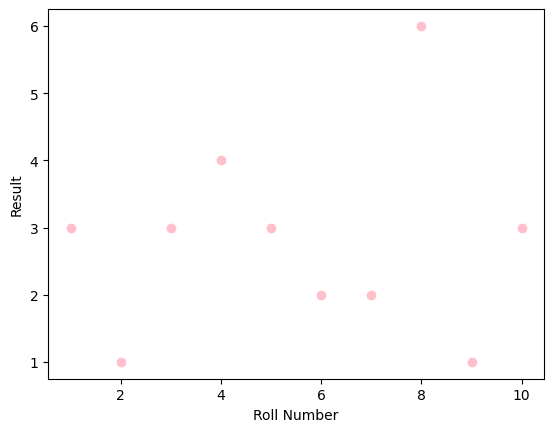

In [3]:
# your code here
print(dice_res_df.sort_values(by=['Result'], ascending=True))
x = dice_res_df['Roll_Number']
y = dice_res_df['Result']
plt.scatter(x,y, c='pink')
plt.xlabel('Roll Number')
plt.ylabel('Result')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
freq_dis = (pd.DataFrame(dice_res_df['Result'].value_counts().reset_index()))
freq_dis.columns = ['Result', 'Frequency']
freq_dis

,Result,Frequency
0,3,4
1,1,2
2,2,2
3,4,1
4,6,1


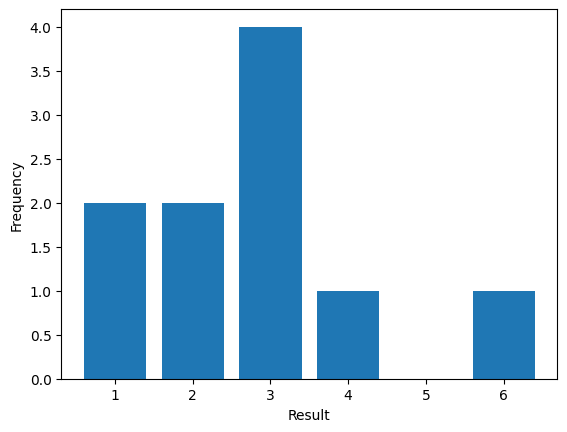

In [5]:
plt.bar(freq_dis['Result'], freq_dis['Frequency'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()

In [6]:
"""
your comments here
both graphs represent the same event, the second one focuses on the frequency of each result of our experience.
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean_calc(results):
    return sum(results)/len(results)

mean_calc(dice_res_df['Result'])

2.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
new_dicer = dice_res_df['Result'].value_counts()
new_dicer = pd.DataFrame(freq_dis)
display(new_dicer)

mean = (new_dicer['Result']* new_dicer['Frequency']).sum() / (new_dicer['Frequency']).sum()
mean

,Result,Frequency
0,3,4
1,1,2
2,2,2
3,4,1
4,6,1


2.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [18]:
# your code here
def median_calc(x):
    if len(x) % 2 != 0:
        return (x[int(len(x)/2)])
    else:
        return ((x[int(len(x)/2)] + x[int(len(x)/2)+ 1]) /2) 


sorted_df = dice_res_df.sort_values(by='Result').reset_index()
display(sorted_df)

median_calc(sorted_df['Result'])

,index,Roll_Number,Result
0,1,2,1
1,8,9,1
2,5,6,2
3,6,7,2
4,0,1,3
5,2,3,3
6,4,5,3
7,9,10,3
8,3,4,4
9,7,8,6


3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

# your code here
Dont do this exercise!

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


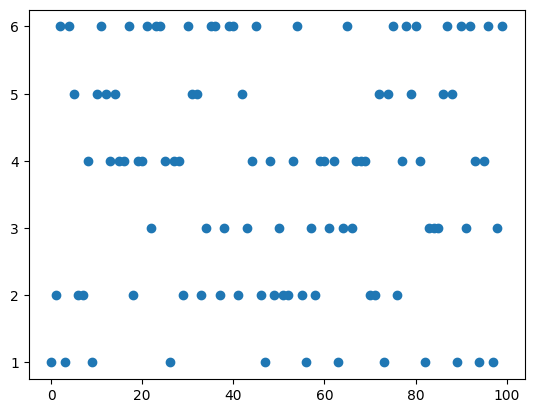

In [63]:
# your code here
dataset = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/Descriptive-Stats/data/roll_the_dice_hundred.csv')
dataset.sort_values(by='value', inplace=True)
display(dataset)

plt.scatter(x = dataset['roll'], y = dataset['value'])
plt.show()

In [ ]:
"""
your comments here
i see the distribution of results (in this case values) across the dataset.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
# your code here

mean_calc(dataset['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [ ]:
# your code here
freq_dist = pd.DataFrame(dataset['value'].value_counts())
freq_dist
freq_dist.index.rename("Result",inplace=True)
freq_dist= freq_dist.reset_index().rename(columns={"value":"Frequency"})
freq_dist

,Result,Frequency
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


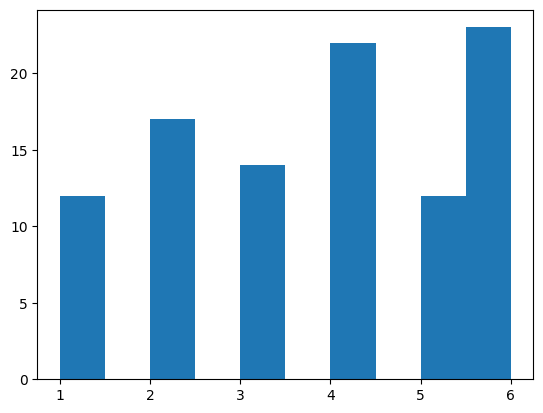

In [65]:
# your code here
plt.hist(dataset['value'])
plt.show()

In [ ]:
"""
your comments here

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


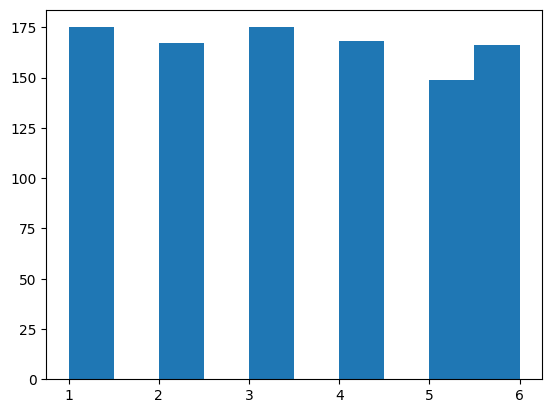

In [66]:
# your code here

data2 = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/Descriptive-Stats/data/roll_the_dice_thousand.csv')
display(data2)

plt.hist(data2['value'])
plt.show()

In [ ]:
"""
your comments here

the size of the sample increased and therefore the values become more concentrated since the frequency remains the same
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64


array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

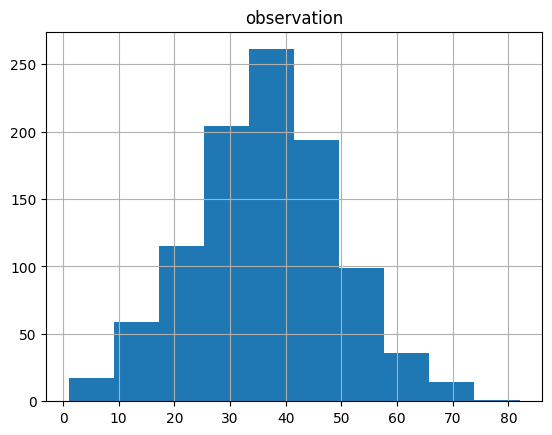

In [51]:
# your code here

ages_pop = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/Descriptive-Stats/data/ages_population.csv')
print(ages_pop.value_counts())
ages_pop.hist()

# i would say that the mean would be between 32 and 41, and stdev around 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [45]:
# your code here
print(ages_pop.mean())
print(ages_pop.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here
"""

#they do fall inside the ranges i predicted.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

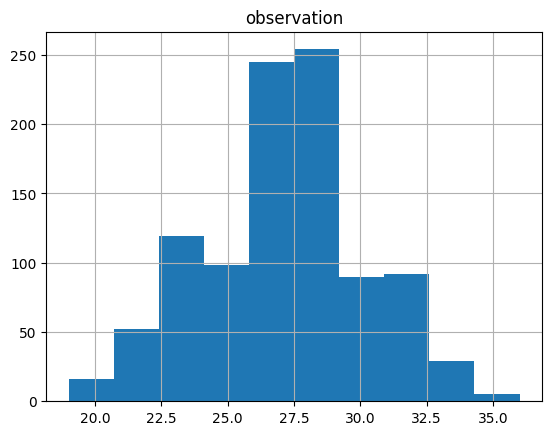

In [52]:
# your code here
ages_pop2 = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/Descriptive-Stats/data/ages_population2.csv')
ages_pop2.value_counts()
ages_pop2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

yes the values are different i would guess that the mean is between the values of 26 and 28 
and stdev between 2,5-3
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [54]:
# your code here
print(ages_pop2.mean())
print(ages_pop2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
compared to the other dataset, the values are smaller.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64


array([[<AxesSubplot: title={'center': 'observation'}>]], dtype=object)

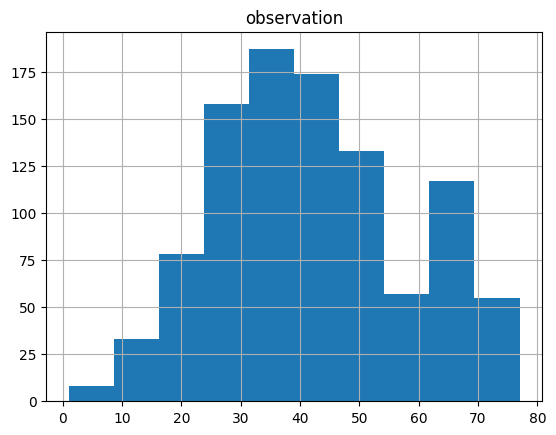

In [57]:
# your code here
ages_pop3 = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/Descriptive-Stats/data/ages_population3.csv')
print(ages_pop3.value_counts())
ages_pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [59]:
# your code here
print(ages_pop3.mean())
print(ages_pop3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here
the values are increasing meaning that so are the ages.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [62]:
# your code here

q1 = ages_pop3.quantile(q=0.25)
q2 = ages_pop3.quantile(q=0.50)
q3 = ages_pop3.quantile(q=0.75)
q4 = ages_pop3.quantile(q = 1)


print(q1, q2, q3, q4)

observation    30.0
Name: 0.25, dtype: float64 observation    40.0
Name: 0.5, dtype: float64 observation    53.0
Name: 0.75, dtype: float64 observation    77.0
Name: 1.0, dtype: float64


In [ ]:
"""
your comments here

the median age is 40 and the mean is 41.989, very close to one another
"""


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""